# Week 3 — Practical Coding Exercise (Constant Model & MSE)
This notebook follows the Week 3 instructions:
- Generate synthetic data `Y`.
- Try a range of constants `c` and compute the MSE for each.
- Find the optimal `c` and compare it with the dataset mean.
- Plot MSE vs. `c` and mark the optimum.
- Reflect on the shape of the curve and the role of a dummy model.
- **Bonus:** implement a simple `train_test_split` with shuffling.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

## 1) Generate synthetic data `Y`

In [ ]:
# Example A: Normal distribution
n = 300
Y = rng.normal(loc=4.0, scale=2.0, size=n)

# Example B: Exponential distribution
# Y = rng.exponential(scale=2.0, size=n)

print(f"n = {Y.size}, mean(Y) ≈ {Y.mean():.4f}, std(Y) ≈ {Y.std(ddof=0):.4f}")

n = 300, mean(Y) ≈ 3.9178, std(Y) ≈ 1.8574


## 2) Grid of constants `c` and MSE calculation

In [ ]:
c_grid = np.linspace(0, 10, 201) 

# Compute MSE for each c
# MSE(c) = (1/n) * sum_i (Y_i - c)^2
mse_values = ((Y[:, None] - c_grid[None, :])**2).mean(axis=0)

# Find the minimum MSE
best_idx = np.argmin(mse_values)
c_star = c_grid[best_idx]
print(f"Best c on the grid: c* = {c_star:.4f}")

Best c on the grid: c* = 3.9000


## 3) Compare optimal `c` with the mean of `Y`

In [4]:
y_mean = Y.mean()
print(f"Mean of Y: {y_mean:.6f}")
print(f"Difference |c* - mean(Y)| = {abs(c_star - y_mean):.6e}")

Mean of Y: 3.917842
Difference |c* - mean(Y)| = 1.784219e-02


## 4) Plot MSE vs. `c` and mark the optimum

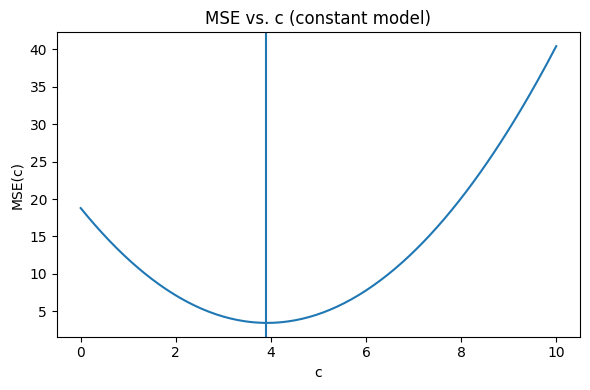

In [5]:
plt.figure(figsize=(6,4))
plt.plot(c_grid, mse_values)
plt.axvline(c_star)  # best c
plt.title("MSE vs. c (constant model)")
plt.xlabel("c")
plt.ylabel("MSE(c)")
plt.tight_layout()
plt.show()

## 5) Interpretation
- The MSE curve is **convex** (parabolic) in `c`.  
- The minimum occurs at **`c = mean(Y)`**. Moving away from the mean increases squared distances, so the MSE grows symmetrically around the mean.


## 6) Why a simple dummy model can be useful
- It gives a **baseline** to compare complex models against (sanity check).
- It is **fast, stable, and interpretable**.
- If a sophisticated model can't beat this baseline, there may be data/feature/label issues.
